In [1]:
'''
Description: This program is to reconstruct a transmitted image, modulated by BPSK scheme, atthe receiver. The maximum 
likelihood decoder will be used at the receiver to recover the symbols. Tomodel a channel for transmission AWGN noise 
will be added to transmitted signal before processing at the receiver. The bit error rate (BER) vs SNR(in dB) curve will 
be plotted for different values of SNR and will be compared with the theoretical value.
Author: Hani Roshan CK
Date: 3/04/2023
'''

'\nDescription: This program is to reconstruct a transmitted image, modulated by BPSK scheme, atthe receiver. The maximum \nlikelihood decoder will be used at the receiver to recover the symbols. Tomodel a channel for transmission AWGN noise \nwill be added to transmitted signal before processing at the receiver. The bit error rate (BER) vs SNR(in dB) curve will \nbe plotted for different values of SNR and will be compared with the theoretical value.\nAuthor: Hani Roshan CK\nDate: 3/04/2023\n'

In [1]:
#Importing libraries
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

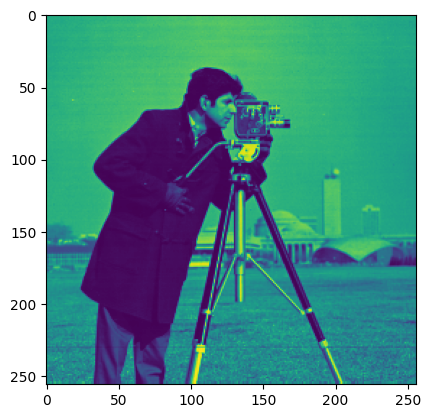

In [2]:
#Reading image
image = imageio.imread('Desktop/cameraman.png')
plt.imshow(image)
plt.show()

In [3]:
#Taking the pixel values and putting them in the form of an array
rearranged_image=np.reshape(image, (1,65536))
print(rearranged_image)

[[156 159 158 ... 133 130 113]]


In [4]:
#Converting each of the pixel values into bits and converting it into an array
binary_list=np.unpackbits(image)
binary_array=np.array(binary_list)

In [5]:
#Mapping 1 to 0 and 0 to -1
modified_list=[]
for i in range(len(binary_list)):
    if binary_list[i]==1:
        modified_list.append(1)
    else:
        modified_list.append(-1)
modified_array=np.array(modified_list)

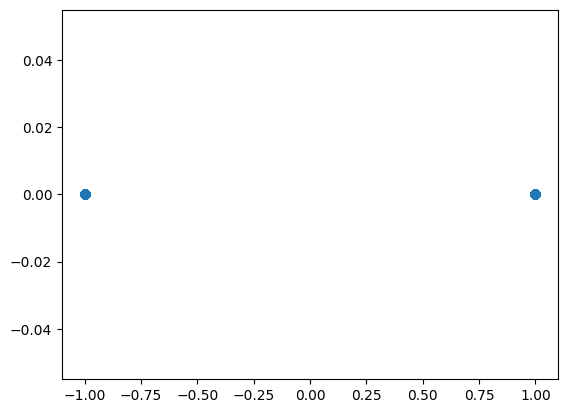

In [6]:
#plotting constellation diagram of the mapped signal
plt.scatter(modified_array.real,modified_array.imag)

In [7]:
#Making WGN and adding it with the mapped signal to simulate recieved signal
snr=15
sigma=np.sqrt(1/10**(snr/10))
num=len(modified_list)
wgn=np.random.normal(0,sigma/np.sqrt(2),num)+1j*np.random.normal(0,sigma/np.sqrt(2),num)
recieved_signal=modified_array+wgn

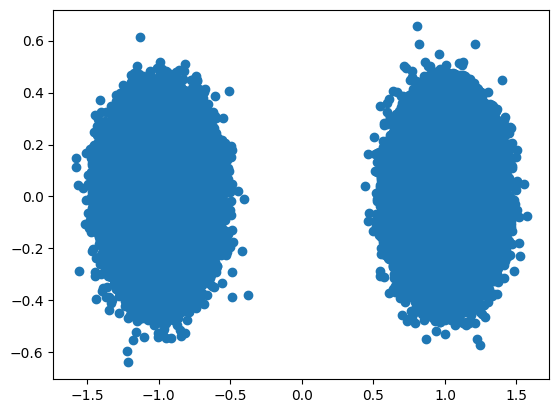

In [8]:
#plotting constellation diagram of the recieved signal
plt.scatter(recieved_signal.real,recieved_signal.imag)

In [9]:
#Mapping recieved signal
demapped_signal=[]
for i in range(num):
    if abs(recieved_signal[i]-1)>abs(recieved_signal[i]+1):
        demapped_signal.append(-1)
    else:
        demapped_signal.append(1)
demapped_signal_arr=np.array(demapped_signal)

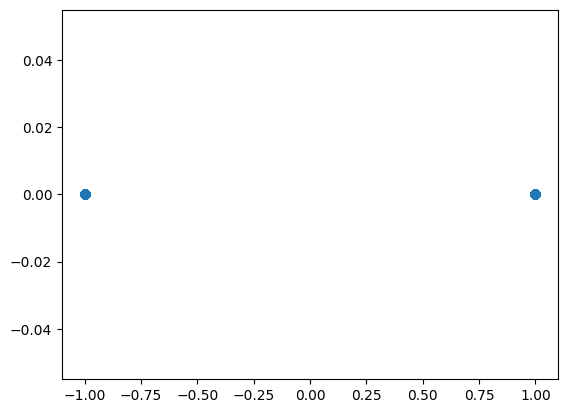

In [10]:
#Plotting mapped recieved signal
plt.scatter(demapped_signal_arr.real,demapped_signal_arr.imag)

In [11]:
#Demapping the recieved signal into individual bits
demapped_bits=[]
for i in demapped_signal:
    if i==1:
        demapped_bits.append(1)
    else:
        demapped_bits.append(0)

In [12]:
#Grouping the bits into 8 bit binary
demapped_binary=[]
for i in range(int(num/8)):
    temp=''
    for j in range(8):
        temp=temp+str(demapped_bits[8*i+j])
    demapped_binary.append(temp)
demapped_binary_array=np.array(demapped_binary)

In [13]:
#Converting the binary into pixel values
pixel_values=[]
for i in demapped_binary:
    pixel_values.append(int(i,2))

In [14]:
#Reshapping the pixel values into an matrix
pixel_values_array=np.array(pixel_values)
rearranged=np.reshape(pixel_values_array, (256,256))

In [15]:
print(rearranged)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


Lossy conversion from int32 to uint8. Range [7, 253]. Convert image to uint8 prior to saving to suppress this warning.


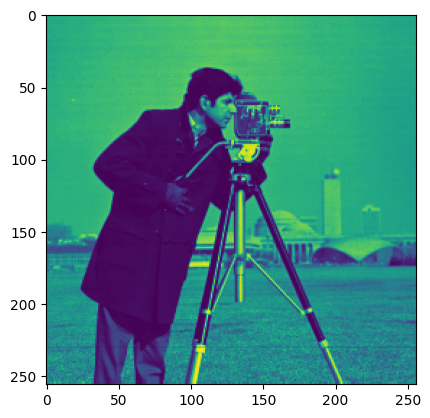

In [16]:
#Reading and displaying recieved image
imageio.imwrite('recieved_image.png', rearranged)
recieved_image=imageio.imread('recieved_image.png')
plt.imshow(recieved_image)
plt.show()

In [17]:
#Finding BER value
sum=0
for i in range(len(binary_list)):
    if binary_list[i]!=demapped_bits[i]:
        sum=sum+1
BER=sum/len(binary_list)
print(BER)

0.0


In [23]:
#To make different values of SNR and BER
snr_arr=np.arange(-10,11,1)
snr_range=10**(snr_arr/10)
ber_array=[]
for i in range(len(snr_arr)):
    sigma=np.sqrt(1/(10**(snr_arr[i]/10)))
    wgn=np.random.normal(0,sigma/np.sqrt(2),num)+1j*np.random.normal(0,sigma/np.sqrt(2),num)
    recieved_signal=modified_array+wgn
    demapped_signal=[]
    for i in range(num):
        if abs(recieved_signal[i]-1)>abs(recieved_signal[i]+1):
            demapped_signal.append(-1)
        else:
            demapped_signal.append(1)
    demapped_signal_arr=np.array(demapped_signal)
    demapped_bits=[]
    for i in demapped_signal:
        if i==1:
            demapped_bits.append(1)
        else:
            demapped_bits.append(0)
    demapped_binary=[]
    for i in range(int(num/8)):
        temp=''
        for j in range(8):
            temp=temp+str(demapped_bits[8*i+j])
        demapped_binary.append(temp)
    demapped_binary_array=np.array(demapped_binary)
    pixel_values=[]
    sum=0
    for i in demapped_binary:
        pixel_values.append(int(i,2))
    pixel_values_array=np.array(pixel_values)
    rearranged=np.reshape(pixel_values_array, (256,256))
    for i in range(len(binary_list)):
        if binary_list[i]!=demapped_bits[i]:
            sum=sum+1
    ber_array.append(sum/(len(binary_list)))

In [24]:
#Finding theoretical value of BER
ber_theory = 0.5*erfc(np.sqrt(snr_range))

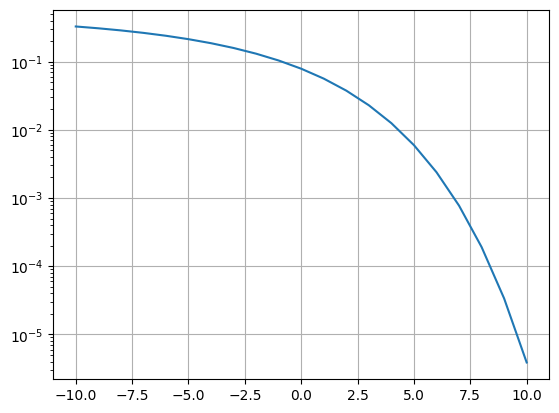

In [25]:
#Plotting for theoretical BER value
plt.semilogy(snr_arr, ber_theory)
plt.grid()

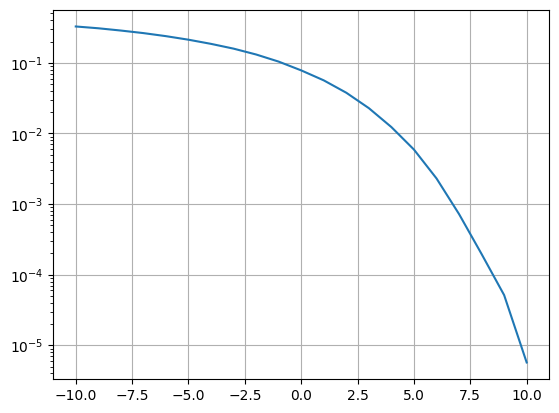

In [26]:
#Plotting for obtained BER value
plt.semilogy(snr_arr,ber_array)
plt.grid()

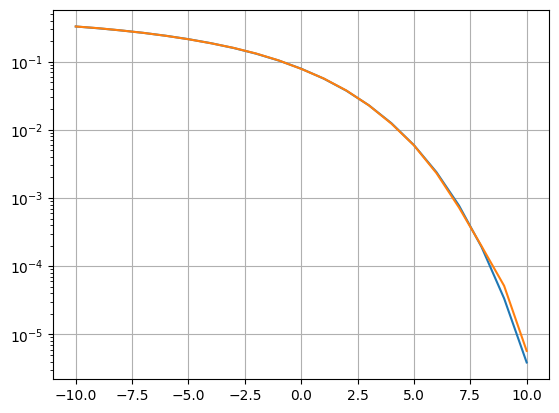

In [27]:
plt.semilogy(snr_arr, ber_theory)
plt.semilogy(snr_arr,ber_array)
plt.grid()